# ML Tutorial Day 13

## K Means Clustering
Machine learning algorithms are categorised into three categories, supervised, unsupervised and reinforcement learning. 

In supervised ML, we have both the data and the target value, and we try to generalize the relationship between them.

In unsupervised ML, we just have the features data and the target values are not present. Using the dataset we try to find the underlying structure and try to find clusters in the data. 

We will look at K-means clustering algorithm

Suppose we have a dataset like below and the axes represent two features. We want to divide the data into cluster based on some criteria.

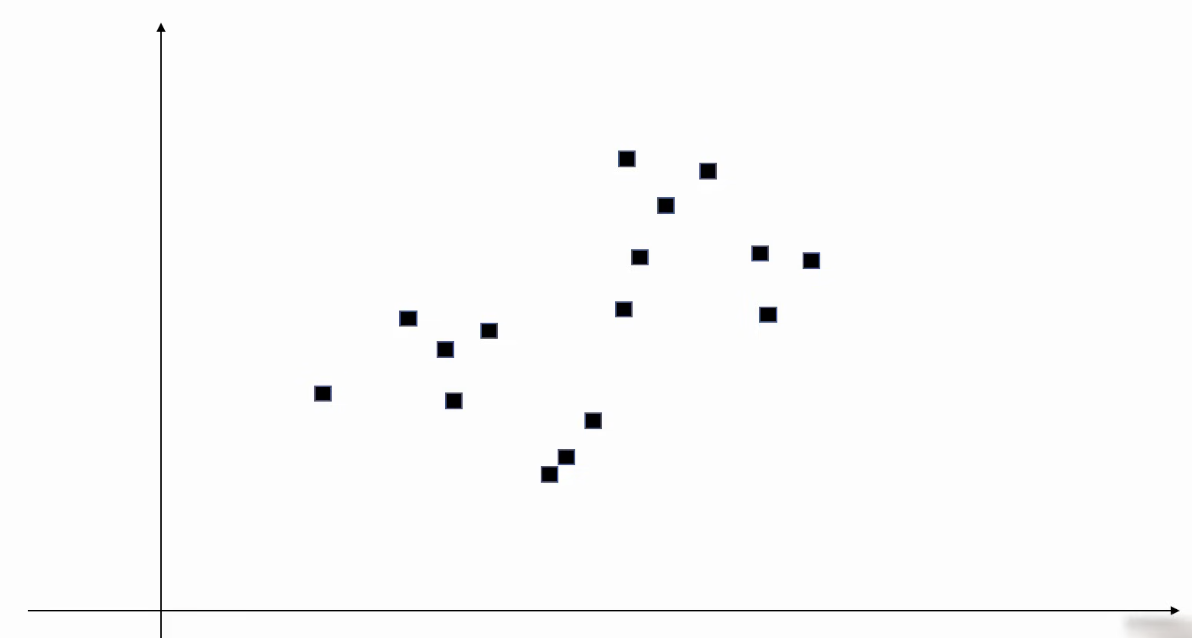

K is a free parameter that decides the number of clusters that we want to identify.

The algorithm is implemented in the following way:
1. We start with two random points that we call the centroids of those clusters

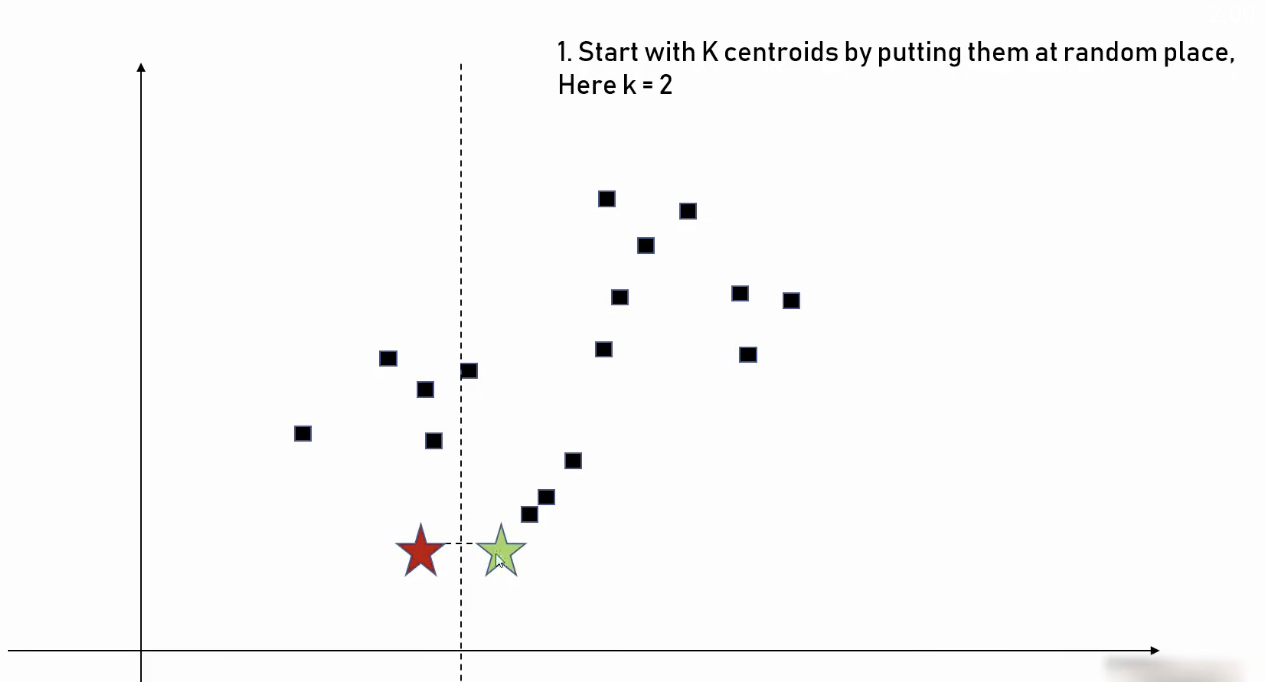

2. We calculate the distance of each point from the centroid

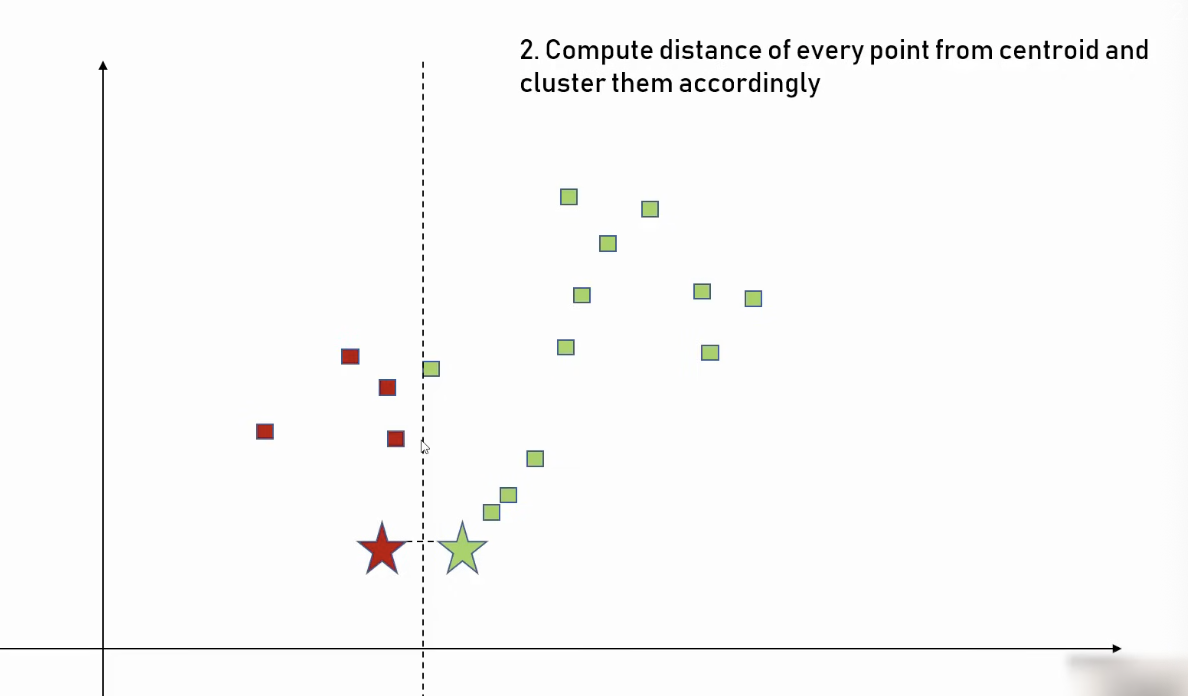

3. We adjust the centroids so that they become the centre of gravity for that cluster  

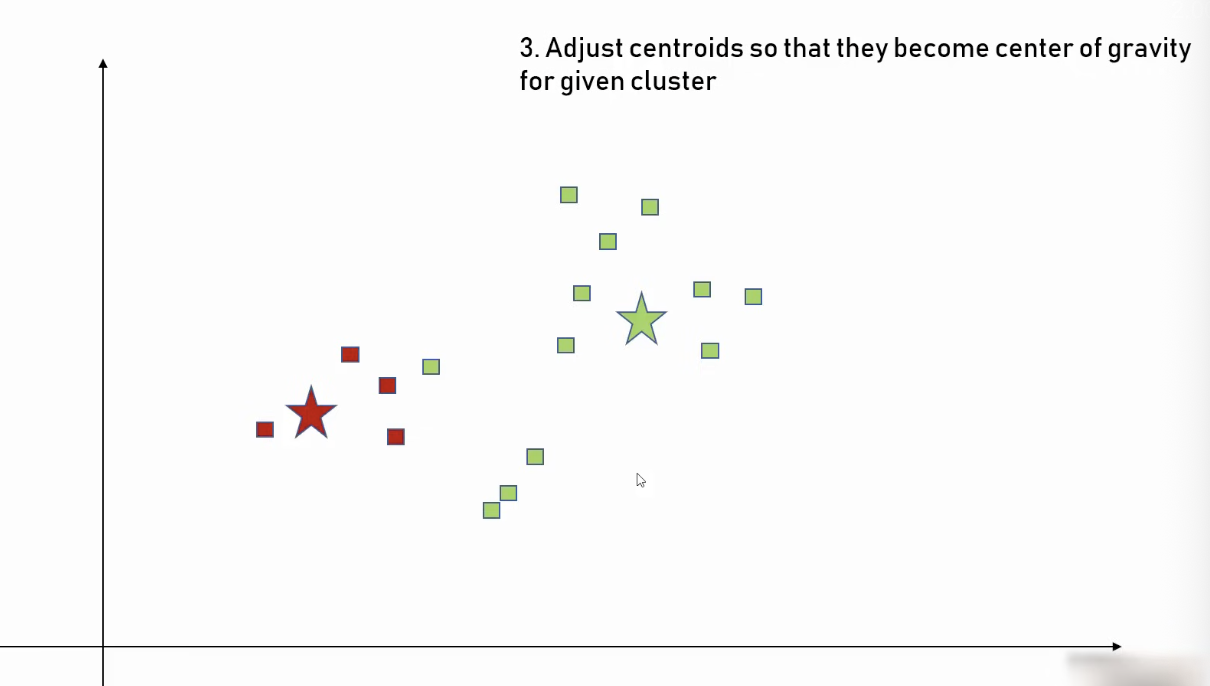

4. We again compute the distance of points from the centroids and re-adjust the centroids

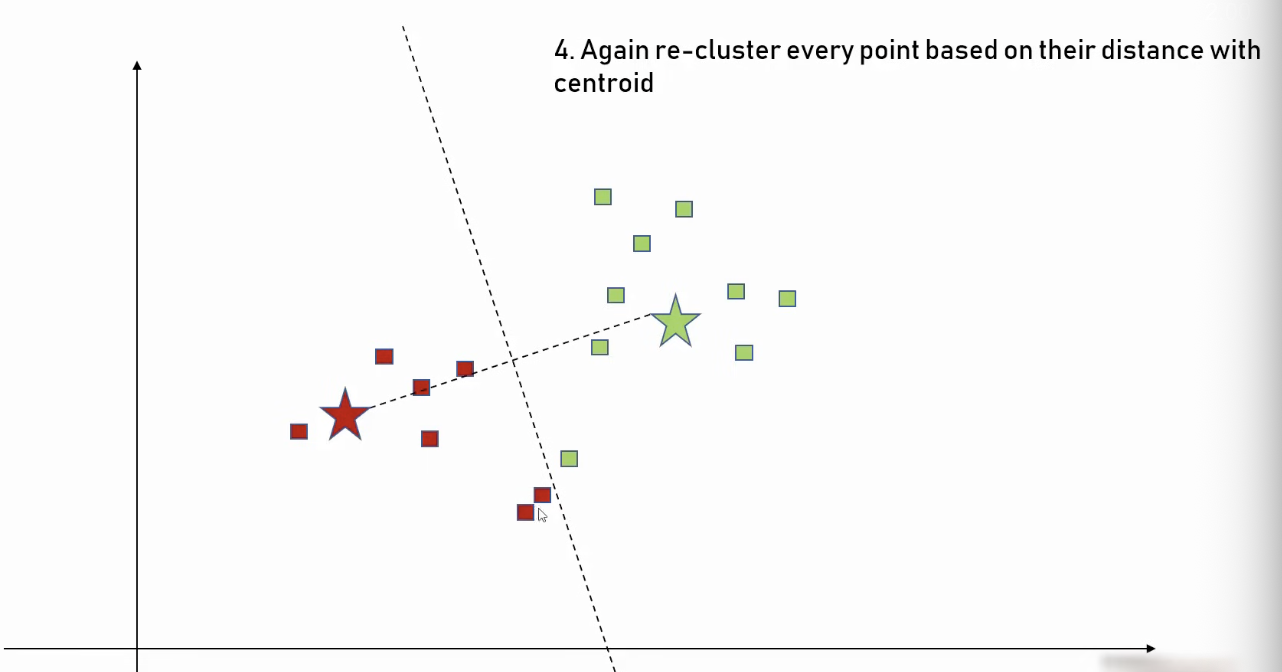

5. We re-adjust the centroids until none of the datapoints change cluster 

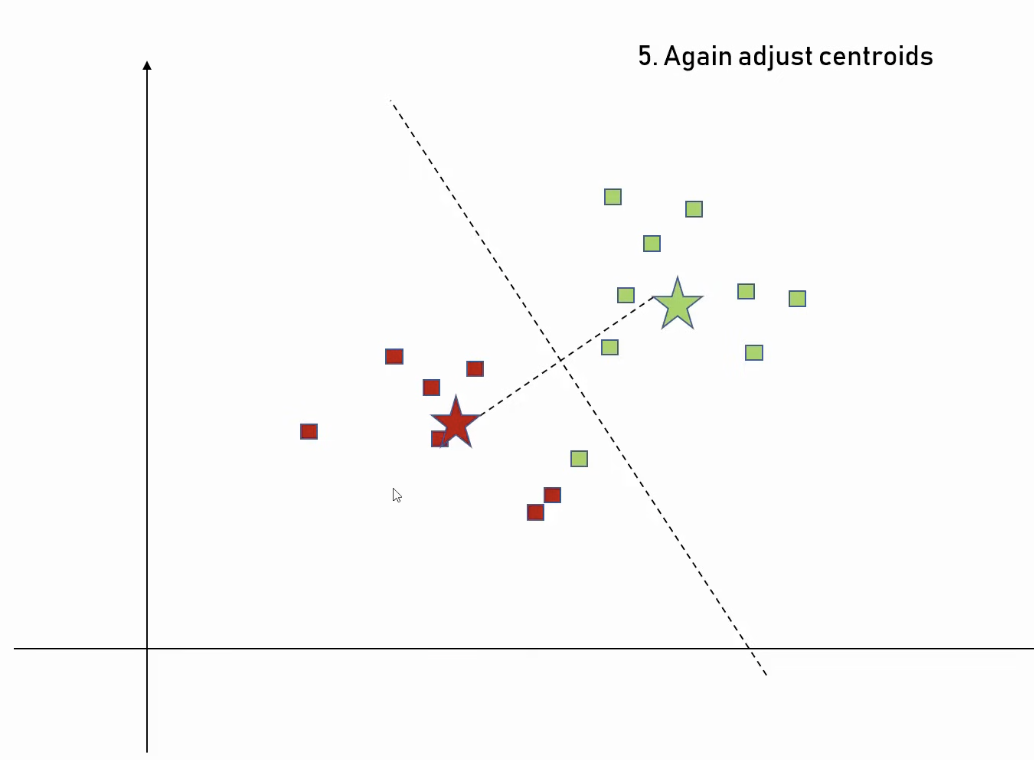

6. The final cluster 

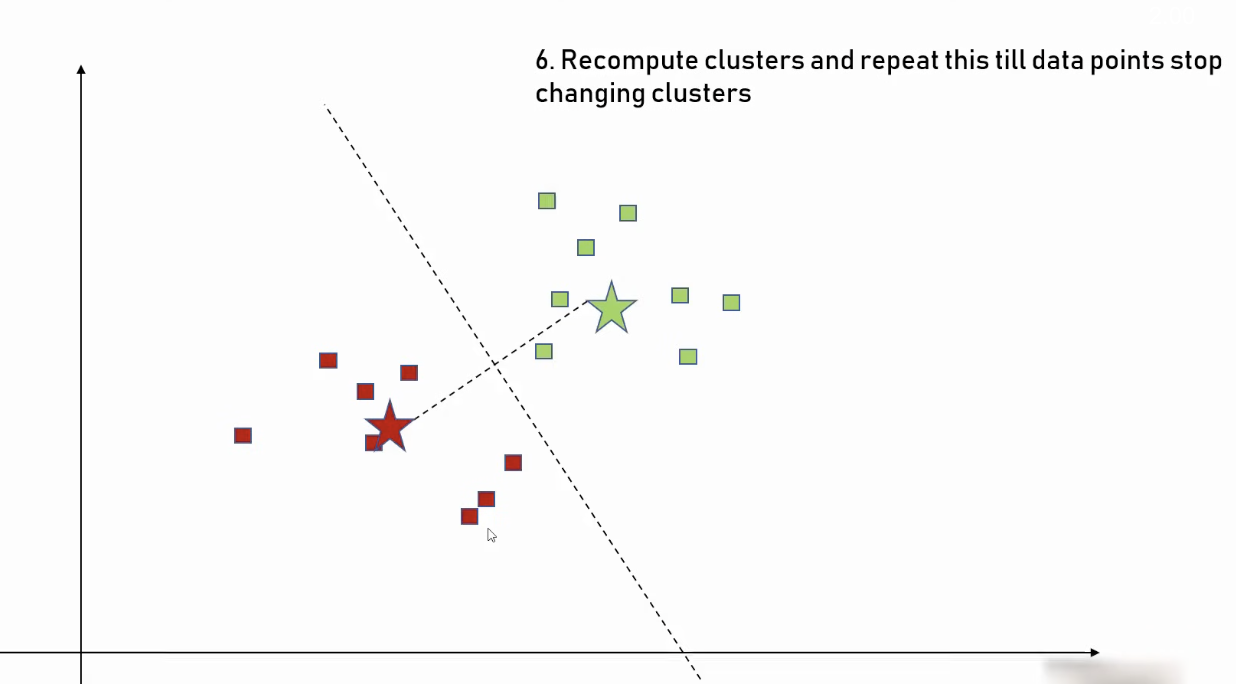

We need to supply the `K` to the algorithm, but how do we decide what value is the best?


We use the elbow method to calculate the value of K.

1. Calculate the sum of squared errors for each cluster for a particular K

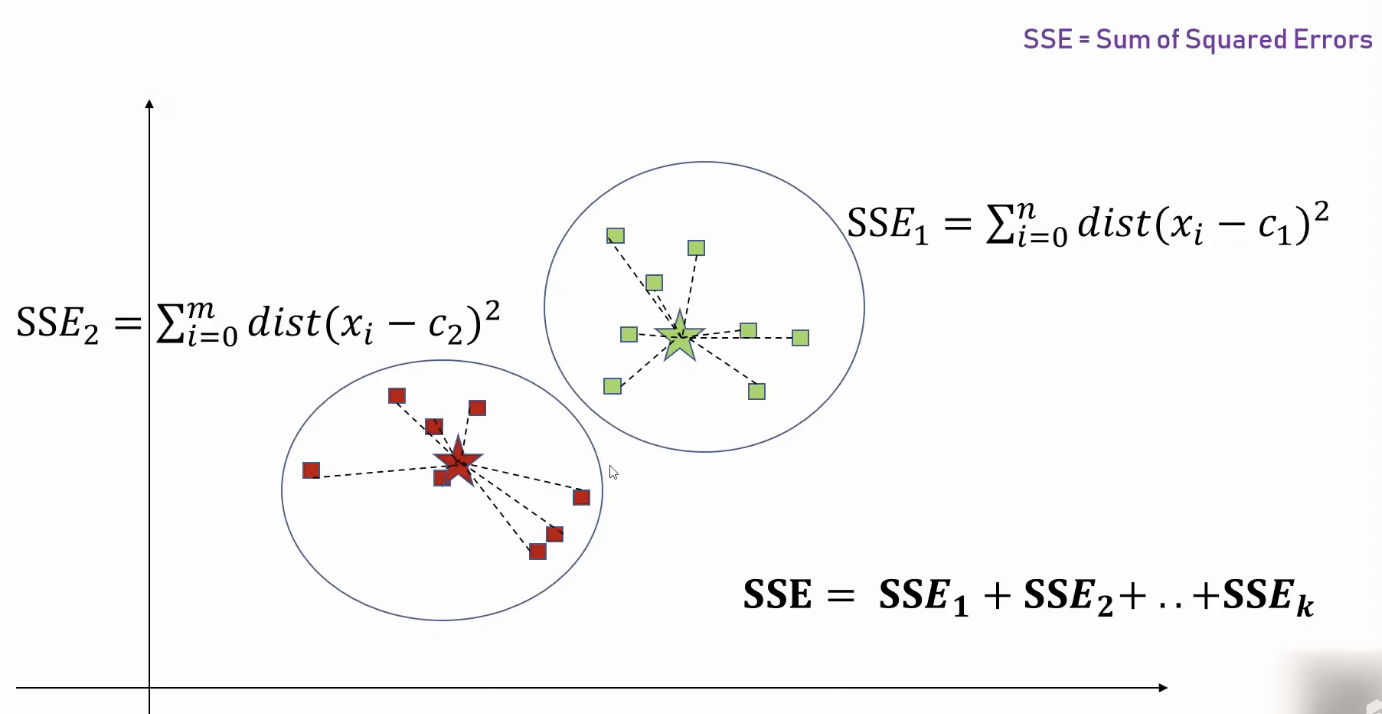

2. Draw the plot of SSE with K and look for the point that seems like its sitting at the elbow of the plot.

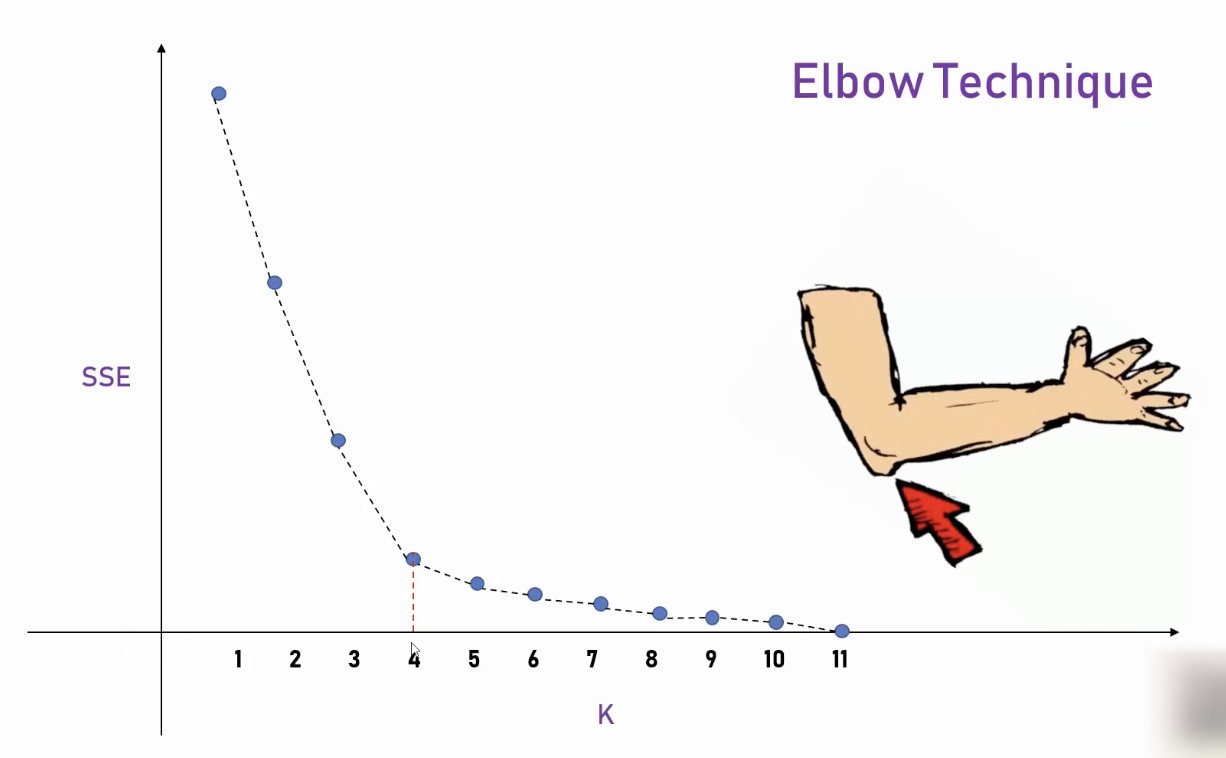

So we can say that K=4 is an ideal number for this dataset.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# importing the dataset
df = pd.read_csv('income.csv')
df

In [ ]:
# plotting the dataset
plt.scatter(df['Age'], df['Income($)'])

We can see that the data is divided into three clusters, thus, dividing the data into three clusters makes sense.

In [ ]:
# creating the model
km = KMeans(n_clusters=3)
km

In [ ]:
# fitting and predicting
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

In [ ]:
# adding the data to the dataframe
df['Cluster'] = y_predicted
df.head()

In [ ]:
# visualising the clustering
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]
plt.scatter(df1['Age'], df1['Income($)'], color='green', marker='+')
plt.scatter(df2['Age'], df2['Income($)'], color='red', marker='*')
plt.scatter(df3['Age'], df3['Income($)'], color='blue', marker='.')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend

In the above plot we can see that the green group is segregated properly, but the blue and red groups are not. This is because we have not scaled our data properly, yaxis varies from 40000 to 160000 while the range for the xaxis is pretty narrow.
We will use MinMaxScaler to scale the features properly.

In [ ]:
# creating the MinMaxScaler object to scale the features properly
scaler = MinMaxScaler()

# scaling the Income column
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

# scaling the age column
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

In [ ]:
# creating and training the KMean model
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

In [ ]:
# adding the Cluster column to dataframe
df['Cluster'] = y_predicted
df

In [ ]:
# visualising the data
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]
plt.scatter(df1['Age'], df1['Income($)'], color='green', marker='+')
plt.scatter(df2['Age'], df2['Income($)'], color='red', marker='*')
plt.scatter(df3['Age'], df3['Income($)'], color='blue', marker='.')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [ ]:
# the centroids of the clusters
km.cluster_centers_

In [ ]:
# visualising the data
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', label='Centroid', marker='*')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

Here we knew what should be the value of K, but when we are dealing with real datasets, we need to first find the appropriate value of K. We will see how that is done.

In [ ]:
# calculating the sum of squared errors for various values of K
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

sse

In [ ]:
# visualising the sse
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng, sse)
plt.scatter(k_rng, sse)
plt.show()